In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import locale
locale.setlocale(locale.LC_TIME, 'ru_RU')

'ru_RU'

## Прредобработка таблицы

In [4]:
df = pd.read_excel('data.xlsx')
df

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,2021-11-08 00:00:00


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


In [ ]:
df = df.rename(columns={'Unnamed: 5': 'date'})

def filter(check,date):
    return date[:3] + date[-5:] if pd.isna(check) else np.nan

df['date'] = df.apply(lambda x: filter(x.client_id, x.status), axis=1)
df['date'] = df['date'].ffill()
status_ok_df = df.dropna(subset=['client_id'])

In [7]:
df['client_id'] = df['client_id'].astype('int64')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['receiving_date'] = pd.to_datetime(df['receiving_date'], format='%Y-%m-%d', errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 1 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       724 non-null    int64         
 1   sum             724 non-null    float64       
 2   status          724 non-null    object        
 3   sale            724 non-null    object        
 4   new/current     724 non-null    object        
 5   date            724 non-null    datetime64[ns]
 6   document        709 non-null    object        
 7   receiving_date  606 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 50.9+ KB


In [9]:
df

,client_id,sum,status,sale,new/current,date,document,receiving_date
1,6,11693.7,ВНУТРЕННИЙ,-,-,2021-05-01,-,NaT
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,2021-05-01,оригинал,2021-07-26
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-06-08
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-06-08
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,2021-05-01,оригинал,2021-07-07
...,...,...,...,...,...,...,...,...
725,285,4328.7,ОПЛАЧЕНО,Васильев,текущая,2021-10-01,оригинал,2021-11-15
726,360,3096.2,ОПЛАЧЕНО,Васильев,новая,2021-10-01,НЕТ,NaT
727,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,2021-10-01,НЕТ,NaT
728,373,4403.7,ОПЛАЧЕНО,Михайлов,новая,2021-10-01,оригинал,2021-11-08


## Вопросы

1. Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

In [7]:
status_ok_july_df = df[(df['status'] != 'ПРОСРОЧЕНО') & (df['date'] == '2021-07-01')]
summa = status_ok_july_df['sum'].sum()
print(round(summa, 2))

859896.47


2. Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

In [20]:
grouped_df = df.groupby('date')['sum'].sum().reset_index()
print(grouped_df)

        date         sum
0 2021-05-01   809572.19
1 2021-06-01   810266.11
2 2021-07-01   861874.17
3 2021-08-01   850435.79
4 2021-09-01   820383.78
5 2021-10-01  1033148.39


<BarContainer object of 6 artists>

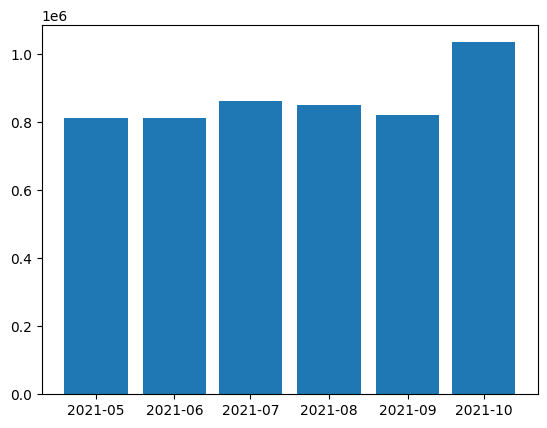

In [21]:
plt.bar(grouped_df['date'], grouped_df['sum'], width=25)

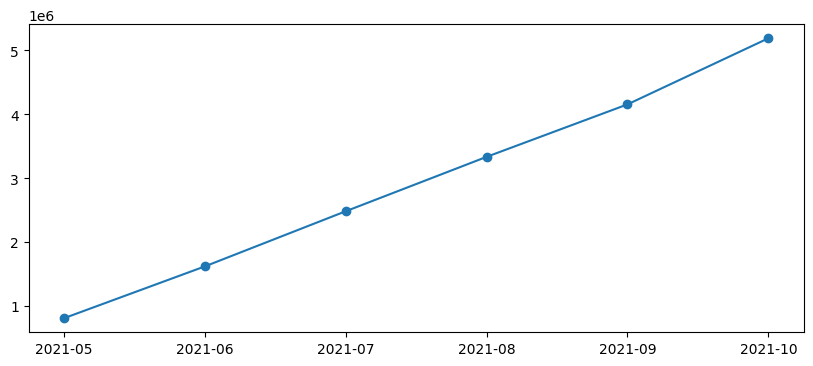

In [19]:
df['month'] = df['date'].dt.to_period('M')
aggregated_df = df.groupby('month')['sum'].sum().reset_index()
plt.figure(figsize=(10, 4))
plt.plot(aggregated_df['month'].astype(str), aggregated_df['sum'].cumsum(), marker='o')

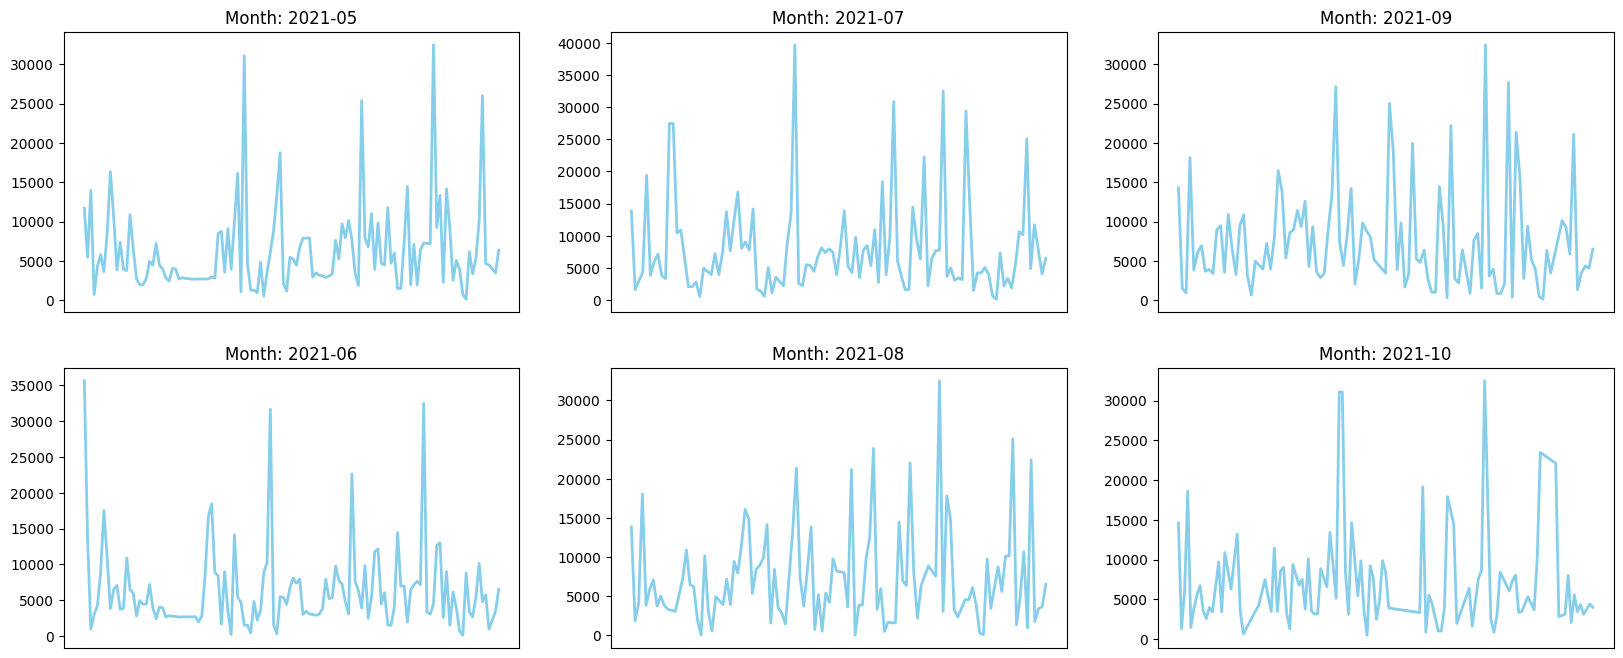

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
months = ['2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10']
for i, month in enumerate(months):
    ax = axes[i % 2, i // 2]
    month_data = df[(df['status'] != 'ПРОСРОЧЕНО') & (df['date'] == months[i])]
    ax.set_title(f'Month: {month}')
    ax.axes.get_xaxis().set_visible(False)
    ax.plot(month_data['sum'], color='skyblue', linestyle='-', linewidth=2)

3. Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

In [41]:
sep_manager_sales_df = df[df['date'] == '2021-09-01'].groupby('sale')['sum'].sum().reset_index()
sep_manager_sales_df.sort_values(by='sum', ascending=False)

,sale,sum
6,Смирнов,221525.70
5,Петрова,149344.46
0,Андреев,133652.50
2,Иванов,94770.60
3,Кузнецова,72228.40
8,Филимонова,59514.47
1,Васильев,49895.45
7,Соколов,35183.50
4,Михайлов,4268.70


In [42]:
manager_max_sale = sep_manager_sales_df[sep_manager_sales_df['sum'] == sep_manager_sales_df['sum'].max()]
manager_max_sale

,sale,sum
6,Смирнов,221525.7


4. Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [40]:
okt_deals_df = df[df['date'] == '2021-10-01'].groupby('new/current').size()
okt_deals_df

new/current
новая      36
текущая    99
dtype: int64

5. Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [48]:
may_doc_df = df[(df['date'] == '2021-05-01') & (df['document'] == 'оригинал')].shape[0]
may_doc_df

123

## Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.